In [1]:
import numpy as np
from pydft import MoleculeBuilder, DFT
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy as sp

# CO

In [2]:
# perform DFT calculation on the CO molecule
co = MoleculeBuilder().from_name("CO")
print(co)
dft = DFT(co, basis='sto3g')
en = dft.scf(1e-6)
result=dft.get_data()

Molecule: None
 O (0.000000,0.000000,0.967698)
 C (0.000000,0.000000,-1.290265)



In [3]:
P=result['P']
S=result['S']
p_C=result['C']
M_O=np.sum(P[:5,:]*S[:,:5].T)
M_C=np.sum(P[5:,:]*S[:,5:].T)
M_mu=M_O+M_C
charge_o=8-M_O
charge_c=6-M_C
corrected_o=9-M_O
corrected_c=5-M_C

mu_O=charge_o*2.26*1/2.541
mu_C=charge_c*2.26*1/2.542

print(f'Mulliken Pop Oxygen: {M_O} \nMulliken Pop Carbon: {M_C} \nMulliken Total Pop: {M_mu} \nCharge on O:{charge_o,corrected_o} \nCharge on C:{charge_c,corrected_c} \nIn Dalton for O: {mu_O}, and for C: {mu_C}')

Mulliken Pop Oxygen: 8.082490891102417 
Mulliken Pop Carbon: 5.917509108897577 
Mulliken Total Pop: 13.999999999999993 
Charge on O:(-0.0824908911024167, 0.9175091088975833) 
Charge on C:(0.08249089110242291, -0.9175091088975771) 
In Dalton for O: -0.07336852179907978, and for C: 0.07333965928067497


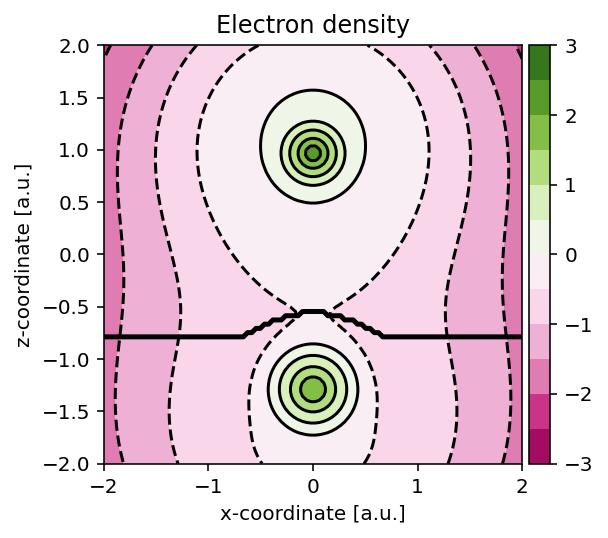

In [4]:
# generate grid of points and calculate the electron density for these points
sz = 4      # size of the domain
npts = 100  # number of sampling points per cartesian direction


# produce meshgrid for the xz-plane
x = np.linspace(-sz/2,sz/2,npts)
zz, xx = np.meshgrid(x, x, indexing='ij')
gridpoints = np.zeros((zz.shape[0], xx.shape[1], 3))
gridpoints[:,:,0] = xx
gridpoints[:,:,2] = zz
gridpoints[:,:,1] = np.zeros_like(xx) # set y-values to 0
gridpoints = gridpoints.reshape((-1,3))

# calculate (logarithmic) scalar field and convert if back to an 2D array
density = dft.get_density_at_points(gridpoints)
density = np.log10(density.reshape((npts, npts)))

grid=x.copy()
y=[]
y_flux=[]
mins=[]
D=np.zeros((len(x),len(x)-1))
for i in range(len(x)):
    pos=np.where(density[:,i]==np.min(density[:,i]))
    mins.append(np.min(density[:,i]))
    y.append(x[pos][0]) 

y_min=min(y)
min_place=np.where(np.array(y)==y_min)
y_new=np.array(y)
y_new[:min_place[0][0]]=y_min
y_new[min_place[0][-1]:]=y_min
    

# build contour plot
fig, ax = plt.subplots(1,1, dpi=144, figsize=(4,4))
im = ax.contourf(x, x, density, levels=np.linspace(-3,3,13, endpoint=True), cmap='PiYG')
ax.contour(x, x, density, colors='black', levels=np.linspace(-3,3,13, endpoint=True))
ax.plot(x,y_new,c='k', linewidth=2.5)
ax.set_aspect('equal', 'box')
ax.set_xlabel('x-coordinate [a.u.]')
ax.set_ylabel('z-coordinate [a.u.]')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')
ax.set_title('Electron density')

plt.plot(y,mins, '.')
plt.show()

# CH4

In [5]:
# perform DFT calculation on the CO molecule
ch4 = MoleculeBuilder().from_name("CH4")
print(ch4)
dft = DFT(ch4, basis='sto3g')
en = dft.scf(1e-6)
result=dft.get_data()

Molecule: None
 C (0.000000,0.000000,0.000000)
 H (1.195756,1.195756,1.195756)
 H (-1.195756,-1.195756,1.195756)
 H (-1.195756,1.195756,-1.195756)
 H (1.195756,-1.195756,-1.195756)



In [6]:
P=result['P']
S=result['S']
p_C=result['C']
M_C=np.sum(P[:5,:]*S[:,:5].T)
M_H1=np.sum(P[5:6,:]*S[:,5:6].T)
M_H2=np.sum(P[6:7,:]*S[:,6:7].T)
M_H3=np.sum(P[7:8,:]*S[:,7:8].T)
M_H4=np.sum(P[8:9,:]*S[:,8:9].T)
M_mu=M_C+M_H1+M_H2+M_H3+M_H4
charge_c=6-M_C
list_charge_h=1-np.array([M_H1,M_H2,M_H3,M_H4])

mu_C=charge_c*2.26*1/2.541
mu_H=list_charge_h*2.26*1/2.542

print(f'Mulliken Pop Carbon: {M_C} \nMulliken Pop Hs: {M_H1,M_H2,M_H3,M_H4} \nMulliken Total Pop: {M_mu} \nCharge on C:{charge_c} \nCharge on Hs:{list_charge_h} \nIn Dalton for C: {mu_C}, and for H: {mu_H}')

Mulliken Pop Carbon: 6.390711776134179 
Mulliken Pop Hs: (0.902322055966507, 0.9023220559664437, 0.9023220559664406, 0.9023220559664291) 
Mulliken Total Pop: 9.999999999999998 
Charge on C:-0.39071177613417873 
Charge on Hs:[0.09767794 0.09767794 0.09767794 0.09767794] 
In Dalton for C: -0.347504373893445, and for H: [0.08684192 0.08684192 0.08684192 0.08684192]
